In [2]:
import random
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy
import scipy.special

In [3]:
jaud=1/2  #aij in Jastrow if antiparallel
jauu=1/4  #aij in Jastrow if parallel
jbud=1  #bij in Jastrow if antiparallel
jbuu=1  #bij in Jastrow if parallel

In [4]:
def Metropolisguess(r,delta):
    rn=np.zeros((len(r),len(r[0])))
    for i in range(len(r)):
        for j in range(len(r[0])):
            a=random.uniform(0,1)
            rn[i][j]= r[i][j]+delta*(a-0.5)
    return rn

In [5]:
#Metropolis
def Metropolis(r,delta, psi, b,counter, acc):
    rn = Metropolisguess(r,delta)
    p=psi(rn,b)**2/psi(r,b)**2
    if p>1:
        r=rn
        acc+=1
    else:
        xi=random.uniform(0,1)
        if p>xi:
            r=rn
            acc+=1

    counter+=1
    return r,acc, counter

In [6]:
def adjust_delta(delta, acceptance_rate):
    if acceptance_rate > 0.6:
        delta *= 1.1  # Increase delta by 10%
    elif acceptance_rate < 0.4:
        delta *= 0.9  # Decrease delta by 10%
    return delta

In [7]:
def psix(x, b):
    return math.exp(-x**2/(2*b**2))

def psiy(y, b):
    return math.exp(-y**2/(2*b**2))

def psi(x,y,b):
    return psix(x,b)*psiy(y,b)

def chip(x,y,b):
    return x*psi(x,y,b)

def chim(x,y,b):
    return y*psi(x,y,b)

def psi2(r,b):
    return psi(r[0][0],r[1][0],b)*psi(r[0][1],r[1][1],b)

def psi3(r,b):
    A = [[psi(r[0][0],r[1][0],b),psi(r[0][1],r[1][1],b)], 
         [chip(r[0][0],r[1][0],b),chip(r[0][1],r[1][1],b)]]
    return np.linalg.det(A)*psi(r[0][2],r[1][2],b)
    
def psi4(r,b):
    A = [[psi(r[0][0],r[1][0],b),psi(r[0][1],r[1][1],b)], 
         [chip(r[0][0],r[1][0],b),chip(r[0][1],r[1][1],b)]]
    B = [[psi(r[0][2],r[1][2],b),psi(r[0][3],r[1][3],b)], 
         [chip(r[0][2],r[1][2],b),chip(r[0][3],r[1][3],b)]]
    return np.linalg.det(A)*np.linalg.det(B)

def psi5(r,b):
    A = [[psi(r[0][0],r[1][0],b),psi(r[0][1],r[1][1],b),psi(r[0][2],r[1][2],b)], 
         [chip(r[0][0],r[1][0],b),chip(r[0][1],r[1][1],b),chip(r[0][2],r[1][2],b)],
         [chim(r[0][0],r[1][0],b),chim(r[0][1],r[1][1],b),chim(r[0][2],r[1][2],b)]]
    B = [[psi(r[0][3],r[1][3],b),psi(r[0][4],r[1][4],b)], 
         [chip(r[0][3],r[1][3],b),chip(r[0][4],r[1][4],b)]]
    return np.linalg.det(A)*np.linalg.det(B)

def psi6(r,b):
    A = [[psi(r[0][0],r[1][0],b),psi(r[0][1],r[1][1],b),psi(r[0][2],r[1][2],b)], 
         [chip(r[0][0],r[1][0],b),chip(r[0][1],r[1][1],b),chip(r[0][2],r[1][2],b)],
         [chim(r[0][0],r[1][0],b),chim(r[0][1],r[1][1],b),chim(r[0][2],r[1][2],b)]]
    B = [[psi(r[0][3],r[1][3],b),psi(r[0][4],r[1][4],b),psi(r[0][5],r[1][5],b)], 
         [chip(r[0][3],r[1][3],b),chip(r[0][4],r[1][4],b),chip(r[0][5],r[1][5],b)],
         [chim(r[0][3],r[1][3],b),chim(r[0][4],r[1][4],b),chim(r[0][5],r[1][5],b)]]
    return np.linalg.det(A)*np.linalg.det(B)

def jastrowfunct(r,a,b):
    return math.exp(a*r/(1+b*r))

In [8]:
def Jastrow(r,a,b):
    j=1
    for i in range(len(r)):
        j*=jastrowfunct(r[i],a,b)
    return j

In [9]:
def Jastrowpsi(r,b):
    return psix(r[0][0],b)*psiy(r[1][0],b)

def Jastrowpsi2(r,b):
     part=2
     xij=np.zeros(int(part*(part-1)/2))
     yij=np.zeros(int(part*(part-1)/2))
     k=0
     for i in range(len(r[0])):
          for j in range(i):
               xij[k]=r[0][i]-r[0][j]
               yij[k]=r[1][i]-r[1][j]
               k+=1

     rij=np.zeros(int(part*(part-1)/2))
     for i in range(len(rij)):
          rij[i]=np.sqrt(xij[i]**2+yij[i]**2)
          
          
     return psi(r[0][0],r[1][0],b)*psi(r[0][1],r[1][1],b)*Jastrow(rij,jauu,jbuu)

def Jastrowpsi3(r,b):
     part=3
     xij=np.zeros(int(part*(part-1)/2))
     yij=np.zeros(int(part*(part-1)/2))
     k=0
     for i in range(len(r[0])):
          for j in range(i):
               xij[k]=r[0][i]-r[0][j]
               yij[k]=r[1][i]-r[1][j]
               k+=1

     rij=np.zeros(int(part*(part-1)/2))
     for i in range(len(rij)):
          rij[i]=np.sqrt(xij[i]**2+yij[i]**2)
     
     A = [[psi(r[0][0],r[1][0],b),psi(r[0][1],r[1][1],b)], 
         [chip(r[0][0],r[1][0],b),chip(r[0][1],r[1][1],b)]]
     
     return np.linalg.det(A)*psi(r[0][2],r[1][2],b)*Jastrow(rij,jauu,jbuu)
    
def Jastrowpsi4(r,b):
     part=4
     xij=np.zeros(int(part*(part-1)/2))
     yij=np.zeros(int(part*(part-1)/2))
     k=0
     for i in range(len(r[0])):
          for j in range(i):
               xij[k]=r[0][i]-r[0][j]
               yij[k]=r[1][i]-r[1][j]
               k+=1

     rij=np.zeros(int(part*(part-1)/2))
     for i in range(len(rij)):
          rij[i]=np.sqrt(xij[i]**2+yij[i]**2)
     A = [[psi(r[0][0],r[1][0],b),psi(r[0][1],r[1][1],b)], 
         [chip(r[0][0],r[1][0],b),chip(r[0][1],r[1][1],b)]]
     B = [[psi(r[0][2],r[1][2],b),psi(r[0][3],r[1][3],b)], 
         [chip(r[0][2],r[1][2],b),chip(r[0][3],r[1][3],b)]]
     return np.linalg.det(A)*np.linalg.det(B)*Jastrow(rij,jauu,jbuu)

def Jastrowpsi5(r,b):
     part=5
     xij=np.zeros(int(part*(part-1)/2))
     yij=np.zeros(int(part*(part-1)/2))
     k=0
     for i in range(len(r[0])):
          for j in range(i):
               xij[k]=r[0][i]-r[0][j]
               yij[k]=r[1][i]-r[1][j]
               k+=1

     rij=np.zeros(int(part*(part-1)/2))
     for i in range(len(rij)):
          rij[i]=np.sqrt(xij[i]**2+yij[i]**2)
     A = [[psi(r[0][0],r[1][0],b),psi(r[0][1],r[1][1],b),psi(r[0][2],r[1][2],b)], 
         [chip(r[0][0],r[1][0],b),chip(r[0][1],r[1][1],b),chip(r[0][2],r[1][2],b)],
         [chim(r[0][0],r[1][0],b),chim(r[0][1],r[1][1],b),chim(r[0][2],r[1][2],b)]]
     B = [[psi(r[0][3],r[1][3],b),psi(r[0][4],r[1][4],b)], 
         [chip(r[0][3],r[1][3],b),chip(r[0][4],r[1][4],b)]]
     return np.linalg.det(A)*np.linalg.det(B)*Jastrow(rij,jauu,jbuu)

def Jastrowpsi6(r,b):
     part=6
     xij=np.zeros(int(part*(part-1)/2))
     yij=np.zeros(int(part*(part-1)/2))
     k=0
     for i in range(len(r[0])):
          for j in range(i):
               xij[k]=r[0][i]-r[0][j]
               yij[k]=r[1][i]-r[1][j]
               k+=1

     rij=np.zeros(int(part*(part-1)/2))
     for i in range(len(rij)):
          rij[i]=np.sqrt(xij[i]**2+yij[i]**2)
     A = [[psi(r[0][0],r[1][0],b),psi(r[0][1],r[1][1],b),psi(r[0][2],r[1][2],b)], 
         [chip(r[0][0],r[1][0],b),chip(r[0][1],r[1][1],b),chip(r[0][2],r[1][2],b)],
         [chim(r[0][0],r[1][0],b),chim(r[0][1],r[1][1],b),chim(r[0][2],r[1][2],b)]]
     B = [[psi(r[0][3],r[1][3],b),psi(r[0][4],r[1][4],b),psi(r[0][5],r[1][5],b)], 
         [chip(r[0][3],r[1][3],b),chip(r[0][4],r[1][4],b),chip(r[0][5],r[1][5],b)],
         [chim(r[0][3],r[1][3],b),chim(r[0][4],r[1][4],b),chim(r[0][5],r[1][5],b)]]
     return np.linalg.det(A)*np.linalg.det(B)*Jastrow(rij,jauu,jbuu)

In [10]:
def delta_choice(r,delta,b,N_delta,counter,psi):
  acc_rate=1
  while acc_rate>0.6 or acc_rate<0.4:
    acc,counter=0,0
    for i in range(N_delta):
      r, acc,counter = Metropolis(r, delta, psi, b,counter, acc)
    acc_rate=acc/counter
    delta = adjust_delta(delta, acc_rate)

  return delta

In [11]:
def functchoice(n):
    if n==1:
        phi = psi
    elif n==2:
        phi = psi2
    elif n==3:
        phi = psi3
    elif n==4:
        phi = psi4
    elif n==5:
        phi = psi5
    elif n==6:
        phi = psi6
    return phi

In [12]:
def functchoicejastrow(n):
    if n==1:
        phi = Jastrowpsi
    elif n==2:
        phi = Jastrowpsi2
    elif n==3:
        phi = Jastrowpsi3
    elif n==4:
        phi = Jastrowpsi4
    elif n==5:
        phi = Jastrowpsi5
    elif n==6:
        phi = Jastrowpsi6
    return phi

### POINT 3

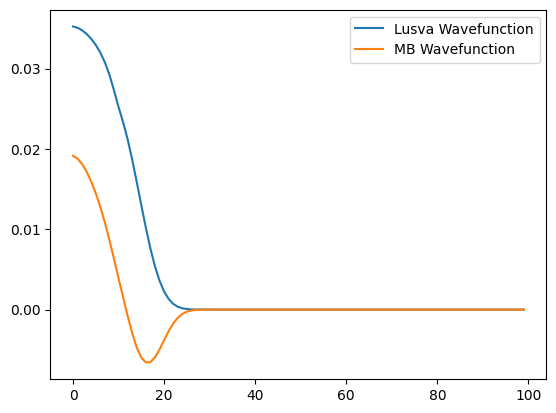

In [96]:
import kinetic_energy as kin
import phi 
import numpy as np
import importlib
from functools import partial
import matplotlib.pyplot as plt
sigma = 1

importlib.reload(kin)
N_test = 5
wavefunction = phi.functchoicejastrow(N_test)
wf_mb = partial(kin.total_wf, N=N_test, N_up= N_test//2, sigma = sigma, b_par = phi.jauu, b_orth = phi.jbuu)
box_size=1
sigma = 1

wf_value_lusva= np.zeros(100)
wf_value_mb= np.zeros(100)
R_test = np.random.uniform(0, box_size, size=(2,N_test))
for i in range(100):
    R_test[1][N_test-1] = R_test[1][N_test-1] + i/200  # Example positions for testing  
    R_test_T = R_test.T
    wf_value_lusva[i] = wavefunction(R_test, sigma)
    wf_value_mb[i] =5* wf_mb(R=R_test_T)[0]
plt.plot(wf_value_lusva, label='Lusva Wavefunction')    
plt.plot(wf_value_mb, label='MB Wavefunction')
plt.legend()
#print(f"Wavefunction value (Lusva): {wf_value_lusva}")
#print(f"Wavefunction value (MB): {wf_value_mb}")

In [44]:
# calculate to christ the kinetic energy in whicherver way 
from scipy.integrate import nquad
from functools import partial

wf_laplacian = lambda R: kin.wf_laplacian(R, wavefunction, sigma)
#integrand = lambda x,y: wf_laplacian(x,y) * wavefunction(np.array([x, y]), sigma)

# Wrapper for flat input of length 2N
def integrand(*args):
    R_flat = np.array(args)  # args is a flat tuple of length 2N
    R = R_flat.reshape(2, N_test)
    return wf_laplacian(R) * wavefunction(R, sigma)

import time

start_time = time.time()
print(wf_laplacian(R_test))
end_time = time.time()
print("Time taken for wf_laplacian:", end_time - start_time)
# Now integrate over x in [-1,1], y in [-1,1]
bounds = [(-1, 1) for _ in range(2 * N_test)]

# Tighter tolerances = slower, Looser tolerances = faster
#opts = {'epsabs': 1e-1, 'epsrel': 1e-1}  # Adjust these as needed

#result, error = nquad(integrand, bounds, opts = [opts]*2*N_test)

#print("Integral =", result)
#print("Estimated error =", error)

0.02107967515818654
Time taken for wf_laplacian: 0.002107858657836914


In [48]:
import numpy as np

def monte_carlo_integrate(wf_laplacian, N, L=2.0, M=100_000, sigma=1.0):
    """
    Monte Carlo integration of a 2N-dimensional function wf_laplacian(R),
    where R is shaped (2, N), over [-L, L]^{2N}.

    Args:
        wf_laplacian: callable R -> float, where R.shape == (2, N)
        N: number of particles
        L: half-width of the integration box
        M: number of Monte Carlo samples
        sigma: passed to wf_laplacian via closure

    Returns:
        estimated integral value
    """

    volume = (2 * L)**(2 * N)
    samples = 2 * L * (np.random.rand(M, 2, N) - 0.5)  # Shape: (M, 2, N)
    
    values = np.array([wf_laplacian(R) for R in samples])
    
    mean = np.mean(values)
    std_err = np.std(values) / np.sqrt(M)
    
    integral = volume * mean
    error = volume * std_err

    return integral, error

N=3
# Run MC integration
I, err = monte_carlo_integrate(wf_laplacian, N, L=1.5, M=100_000)
print(f"Monte Carlo estimate: {I:.6f} ± {err:.6f}")
#Monte Carlo estimate: 5.813657 ± 2.973641
#Monte Carlo estimate: 1.704294 ± 2.970737
#Monte Carlo estimate: 1.488415 ± 2.965339



Monte Carlo estimate: -2.095792 ± 2.986635


### POINT 4

In [232]:
b=1

part = 2
funct=functchoice(part)
r = np.zeros((2,part))
acc, counter=0,0
for i in range(len(r)):
    for j in range(len(r[0])):
        r[i][j]=random.uniform(0,1)   #r[x o y][particella]
        

delta=1
N=1000000
Neq=int(N*1/50)
N_delta=10000
posx1,posy1,posx2,posy2, acc_list=[],[],[],[],[]

In [233]:
delta = delta_choice(r,delta,b,N_delta,0,funct)

for i in range(N):
    r,acc, counter = Metropolis(r, delta, funct, b,counter, acc)
    
    posx1.append(r)

    acc_list.append(acc/counter)


print(f'b={b},\u0394={round(delta,3)}')

b=1,Δ=1.331


Text(0.5, 1.0, 'Acceptance rate')

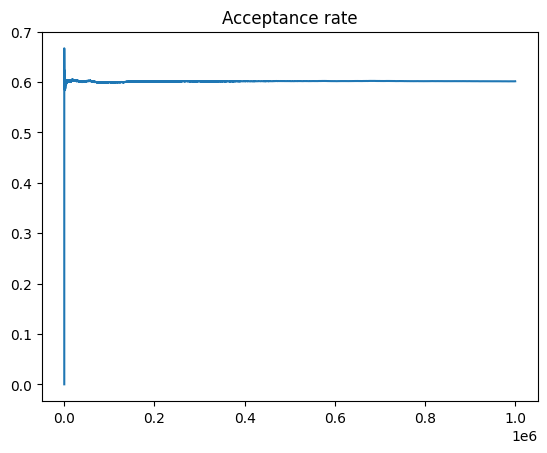

In [234]:
plt.plot(np.array(range(N)),acc_list)
plt.title('Acceptance rate')

### POINT 5

In [235]:
b=1



part = 3

r = np.zeros((2,part))
acc, counter=0,0
for i in range(len(r)):
    for j in range(len(r[0])):
        r[i][j]=random.uniform(0,1)   #r[x o y][particella]
        

funct=functchoicejastrow(part)



acc, counter=0,0
delta=1
N=1000000
Neq=int(N*1/50)
N_delta=10000
posx1,posy1,posx2,posy2, acc_list=[],[],[],[],[]

In [236]:
delta = delta_choice(r,delta,b,N_delta,0,funct)

for i in range(N):
    r,acc, counter = Metropolis(r, delta, funct, b,counter, acc)
    
    posx1.append(r)

    acc_list.append(acc/counter)


print(f'b={b},\u0394={round(delta,3)}')

b=1,Δ=1.1


Text(0.5, 1.0, 'Acceptance rate')

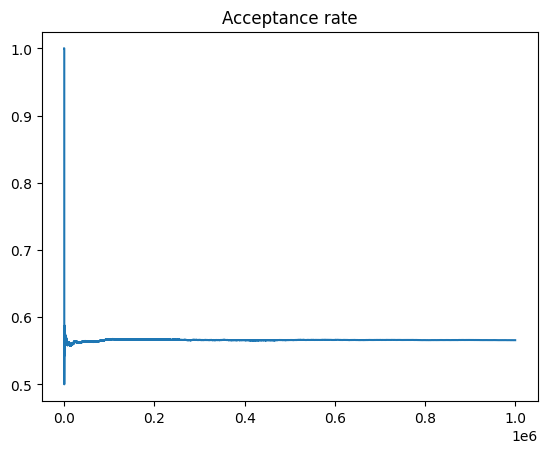

In [237]:
plt.plot(np.array(range(N)),acc_list)
plt.title('Acceptance rate')